In [6]:
import numpy as np
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [7]:
def show_images(image_list):
    for i in image_list:
        plt.imshow(i)
        plt.pause(0.5)

def convertToArray(image_list):
    image_array_list=[]
    for i in image_list:
        image_array_list.append(np.asarray(i))
    return pd.Series(image_array_list)

def convertToImage(image_array_list):
    image_list=[]
    for i in image_array_list:
        image_list.append(Image.fromarray(i))
    return pd.Series(image_list)

In [14]:
def read_data(remove_types):

    reptiles=pd.DataFrame()

    reptile_file=os.listdir("/Users/erikafox/bme-reptile-identification/data/reptiles/")
    for i in reptile_file:
        rep_list=[]
        if (i != ".DS_Store"):
            for j in os.listdir("/Users/erikafox/bme-reptile-identification/data/reptiles/"+i):
                if (j != ".DS_Store"):
                    if len(rep_list)<500:
                        rep_list.append(Image.open("/Users/erikafox/bme-reptile-identification/data/reptiles/"+i+"/"+j).convert("RGBA"))
        
            rep_list=convertToArray(rep_list)
            df=pd.DataFrame({"image":rep_list})

            df["target"]=i
            reptiles=pd.concat([reptiles,df])

    #remove_types=["Lizard","Toad"]
    reptiles=reptiles[reptiles["target"].isin(remove_types)==False]
    return reptiles.reset_index()


In [15]:
reptiles=read_data(["Lizard","Toad"])

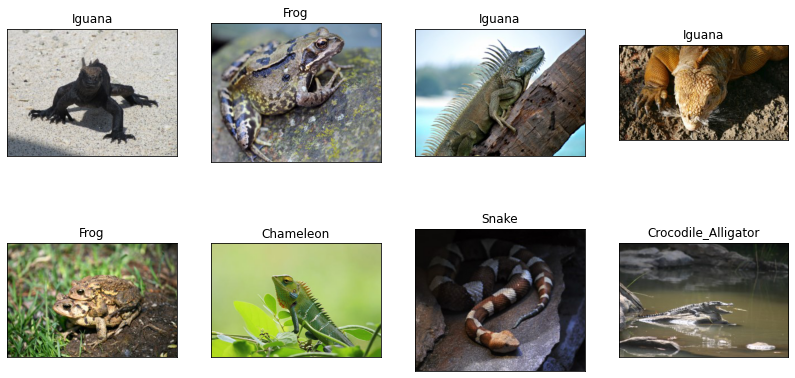

In [18]:
# show a few images 

indices = np.random.randint(0,len(reptiles),8)
i = 1
plt.figure(figsize=(14,7))
for each in indices:
    plt.subplot(2,4,i)
    plt.imshow(reptiles["image"][each])
    plt.title(reptiles['target'].loc[each])
    plt.xticks([])
    plt.yticks([])
    i += 1